**NOTE:**  After doing excel analysis I found there are columns like 'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1' which have high range which can possibly mean mix of gaussian or outliers. Also the data has lots of missing values.


#### Steps for this Exercise

1. EDA: this step include desciptive analysis, multivariate analysis(pair plots and box plots), treating outliers ,treating missing values. Also I removed 'scaled_radius_of_gyration' reason stated down the line

2. Model buliding: In I made SVC on only scaled data.

3. PCA: In this step I first selected only those features in which I can apply PCA which were all columns except these scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2,hollows_ratio. Then I found best n_componets i.e optimum principle components which explain more than 95% of variance using elbow method. Then I combined these components and those left out columns again Then made SVC using those combined dataset and evaluated the model.

4. LDA:  In this step also I first selected only those features in which I can apply LDA which were all columns except these scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2,hollows_ratio. Then I applied LDA to remaing columns and reduced featues to 2 columns. Then I combined these components and those left out columns again Then made SVC using those combined dataset and evaluated the model.

5. KPCA: In this I converted all features X to Kernel principle 'rbf' components and made SVC model and evaluated the model.

6. Grid search and cross validation: Here I found optimum hyper-parameter and did cross validation on it.

7. Conclusion: This is were i concluded about everything I did and conculed weather to use PCA or LDA or KPCA or none of them


**Note:In 3 and 4 step i.e PCA and LDA, I splited data because its better and is must to apply pca and lda to only those which shows linear correlation with other columns**


#### NOTE
***I have Treated NaN values with median of that column and for outliers, I have replaced the outliers with median value as number of outliers are less so converting them to median wont change our dataset much. Also I could have removed outliers which was giving me higher accuracy than replacing outliers but doing so the data got reduced from 849 to 801 this doesn't seems much but data is already less so further reducing data doesn't seems a good option so I replaced outliers with median of that column. Increase data gives high quality ***

In [94]:
#importing Libs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn import metrics
from matplotlib.colors import ListedColormap

from sklearn.svm import SVC
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
sns.set_style('whitegrid')
%matplotlib inline

In [95]:
#importing data into df
df=pd.read_csv("vehicle-2.csv")

In [96]:
#checking the data dimensions
df.shape

(846, 19)

In [97]:
#checking the data if its loaded properly
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [98]:
df.describe().T 
#After seeing 'count' we can conclude that it has missing values
#Column such as 'distance_circularity','radius_ratio','max.length_aspect_ratio','scatter_ratio','elongatedness','max.length_rectangularity','scaled_variance','scaled_variance.1','skewness_about.1' have skew in them.

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [99]:
col=df.iloc[:,:-1].columns

print("differencr between mean and median")

for i in col:
    k= df[i].mean() - df[i].quantile(0.50)
    k=int(k)
    print(i , " = " , k)

print("\n\n")
print("To see right or left side skew")   
for i in col:
    k= df[i].quantile(0.50) - df[i].quantile(0.75)
    k2= df[i].quantile(0.25) - df[i].quantile(0.50)
    print(i , " = " , abs(k2) , "        " , abs(k))
    print("\n")
    


differencr between mean and median
compactness  =  0
circularity  =  0
distance_circularity  =  2
radius_ratio  =  1
pr.axis_aspect_ratio  =  0
max.length_aspect_ratio  =  0
scatter_ratio  =  11
elongatedness  =  -2
pr.axis_rectangularity  =  0
max.length_rectangularity  =  1
scaled_variance  =  9
scaled_variance.1  =  75
scaled_radius_of_gyration  =  1
scaled_radius_of_gyration.1  =  0
skewness_about  =  0
skewness_about.1  =  1
skewness_about.2  =  0
hollows_ratio  =  -1



To see right or left side skew
compactness  =  6.0          7.0


circularity  =  4.0          5.0


distance_circularity  =  10.0          18.0


radius_ratio  =  26.0          28.0


pr.axis_aspect_ratio  =  4.0          4.0


max.length_aspect_ratio  =  1.0          2.0


scatter_ratio  =  10.0          41.0


elongatedness  =  10.0          3.0


pr.axis_rectangularity  =  1.0          3.0


max.length_rectangularity  =  9.0          13.0


scaled_variance  =  12.0          38.0


scaled_variance.1  =  45.5   

In [100]:
#From describe and above code shows these column have skewness:
#right side Skew :  'skewness_about.1', 'scaled_variance.1', 'scaled_variance', 'max.length_rectangularity', 'pr.axis_rectangularity', 'scatter_ratio', 'radius_ratio', 'distance_circularity'                                                        
#Left side SKew:  'hollows_ratio',  'elongatedness'

In [101]:
df.info()  #It is evident that data has missing values
#Also every featues are int or float type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [102]:
#To see datatypes of each column
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [103]:
#To check number of missing value in each column

print("The output will be the sum of missing values columnwise\n\n")

print(df.isnull().sum())

The output will be the sum of missing values columnwise


compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


In [104]:
#To see any missing values
df[df.isnull().any(axis=1)]
#As you can see it has missing values

compactness  circularity  distance_circularity  radius_ratio  \
5            107          NaN                 106.0         172.0   
9             93         44.0                  98.0           NaN   
19           101         56.0                 100.0         215.0   
35           100         46.0                   NaN         172.0   
66            81         43.0                  68.0         125.0   
70            96         55.0                  98.0         161.0   
77            86         40.0                  62.0         140.0   
78           104         52.0                  94.0           NaN   
105          108          NaN                 103.0         202.0   
118           85          NaN                   NaN         128.0   
141           81         42.0                  63.0         125.0   
159           91         45.0                  75.0           NaN   
177           89         44.0                  72.0         160.0   
192           93         43.0                  76.0         149.0   
207           85         42.0                   NaN         121.0   
215           90         39.0                  86.0         169.0   
222          100         50.0                  81.0         197.0   
237           85         45.0                  65.0         128.0   
249           85         34.0                  53.0         127.0   
266           86          NaN                  65.0         116.0   
273           96         45.0                  80.0         162.0   
285           89         48.0                  85.0         189.0   
287           88         43.0                  84.0           NaN   
308          109         51.0                 100.0         197.0   
319          102         51.0                   NaN         194.0   
329           89         38.0                  80.0         169.0   
345          101         54.0                 106.0           NaN   
372           97         47.0                  87.0         164.0   
396          108          NaN                 106.0         177.0   
419           93         34.0                  72.0         144.0   
467           96         54.0                 104.0           NaN   
496          106         55.0                  98.0         224.0   
522           89         36.0                  69.0         162.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
5                    50.0                        6          255.0   
9                    62.0                       11          183.0   
19                    NaN                       10          208.0   
35                   67.0                        9          157.0   
66                   57.0                        8          149.0   
70                   54.0                       10          215.0   
77                   62.0                        7          150.0   
78                   66.0                        5          208.0   
105                  64.0                       10          220.0   
118                  56.0                        8          150.0   
141                  55.0                        8          149.0   
159                  57.0                        6          150.0   
177                  66.0                        7          144.0   
192                  57.0                        7          149.0   
207                  55.0                        7          149.0   
215                  62.0                        7          162.0   
222                   NaN                        6          186.0   
237                  56.0                        8          151.0   
249                  58.0                        6            NaN   
266                  53.0                        6          152.0   
273                  63.0                        9          146.0   
285                  64.0                        8          169.0   
287                  55.0                       11          154.0   
30

In [105]:
#To calculating median of each column
df.median()

compactness                     93.0
circularity                     44.0
distance_circularity            80.0
radius_ratio                   167.0
pr.axis_aspect_ratio            61.0
max.length_aspect_ratio          8.0
scatter_ratio                  157.0
elongatedness                   43.0
pr.axis_rectangularity          20.0
max.length_rectangularity      146.0
scaled_variance                179.0
scaled_variance.1              363.5
scaled_radius_of_gyration      173.5
scaled_radius_of_gyration.1     71.5
skewness_about                   6.0
skewness_about.1                11.0
skewness_about.2               188.0
hollows_ratio                  197.0
dtype: float64

In [106]:
#Treating NaN values with median of that column using Imputer
imputer = Imputer(missing_values='NaN', strategy='median', axis=0)
imputer = imputer.fit(df.iloc[:,:-1])
imputed_data = imputer.transform(df.iloc[:,:-1].values)
df.iloc[:,:-1] = imputed_data



In [107]:
df.isnull().sum() #here it is evident that there is no missing values

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [108]:
#This step is double check for missing values
#This is just to show replaced median value for 4 column 
print(df.iloc[[5,105,118],[1]])
print(df.iloc[[35,118,207],[2]])
print(df.iloc[[9,78,159],[3]])
print(df.iloc[[19,222],[4]])

#Note:I have checked for each column Here I am not showing as it will take space

     circularity
5           44.0
105         44.0
118         44.0
     distance_circularity
35                   80.0
118                  80.0
207                  80.0
     radius_ratio
9           167.0
78          167.0
159         167.0
     pr.axis_aspect_ratio
19                   61.0
222                  61.0


***Using imputer I replaced missing values with median of that column, Also I have check each replaced values.*** 

In [109]:
# Let us check whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of 
# a number.

# we use np.isreal a numpy function which checks each column for each row and returns a bool array, 
# where True if input element is real.
# applymap is pandas dataframe function that applies the np.isreal function columnwise
# Following line selects those rows which have some non-numeric value in any of the columns hence the  ~ symbol

df[~df.applymap(np.isreal).all(1)]

compactness  circularity  distance_circularity  radius_ratio  \
0           95.0         48.0                  83.0         178.0   
1           91.0         41.0                  84.0         141.0   
2          104.0         50.0                 106.0         209.0   
3           93.0         41.0                  82.0         159.0   
4           85.0         44.0                  70.0         205.0   
5          107.0         44.0                 106.0         172.0   
6           97.0         43.0                  73.0         173.0   
7           90.0         43.0                  66.0         157.0   
8           86.0         34.0                  62.0         140.0   
9           93.0         44.0                  98.0         167.0   
10          86.0         36.0                  70.0         143.0   
11          90.0         34.0                  66.0         136.0   
12          88.0         46.0                  74.0         171.0   
13          89.0         42.0                  85.0         144.0   
14          94.0         49.0                  79.0         203.0   
15          96.0         55.0                 103.0         201.0   
16          89.0         36.0                  51.0         109.0   
17          99.0         41.0                  77.0         197.0   
18         104.0         54.0                 100.0         186.0   
19         101.0         56.0                 100.0         215.0   
20          84.0         47.0                  75.0         153.0   
21          84.0         37.0                  53.0         121.0   
22          94.0         43.0                  64.0         173.0   
23          87.0         39.0                  70.0         148.0   
24          99.0         53.0                 105.0         219.0   
25          85.0         45.0                  80.0         154.0   
26          83.0         36.0                  54.0         119.0   
27         107.0         54.0                  98.0         203.0   
28         102.0         45.0                  85.0         193.0   
29          80.0         38.0                  63.0         129.0   
..           ...          ...                   ...           ...   
816         90.0         48.0                  85.0         157.0   
817        104.0         53.0                 108.0         204.0   
818         95.0         43.0                  96.0         202.0   
819         93.0         42.0                  98.0         192.0   
820         87.0         38.0                  71.0         123.0   
821        104.0         56.0                  96.0         231.0   
822         95.0         41.0                  82.0         170.0   
823        105.0         54.0                 105.0         213.0   
824        106.0         55.0                  96.0         196.0   
825         86.0         39.0                  84.0         149.0   
826         95.0         49.0                  92.0         193.0   
827         99.0         57.0                 100.0         177.0   
828         89.0         42.0                  66.0         125.0   
829         95.0         49.0                  82.0         139.0   
830         97.0         37.0                  70.0         173.0   
831        100.0         47.0                  70.0         185.0   
832        108.0         49.0                 109.0         204.0   
833         92.0         46.0                  83.0         154.0   
834         82.0         36.0                  51.0         114.0   
835        111.0         58.0                 105.0         183.0   
836         87.0         45.0                  66.0         139.0   
837         94.0         46.0                  77.0         169.0   
838         95.0         43.0                  76.0         142.0   
839         90.0         44.0                  72.0         157.0   
840         93.0         34.0                  66.0         140.0   
841         93.0         39.0                  87.0         183.0   
842

In [110]:
#converting class values to numerical.
df['class'] = df['class'].replace({'car': 1, 'van': 2, 'bus': 3})

#Note: This step is not necessary but its better to convert so to perform many operations.

In [111]:
df['class'].unique()

array([2, 1, 3], dtype=int64)

#### multivariate ananlysis
I have done pairplots to see mix of gaussian, outliers, relation between features with other features and with target column, Also the distribution

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


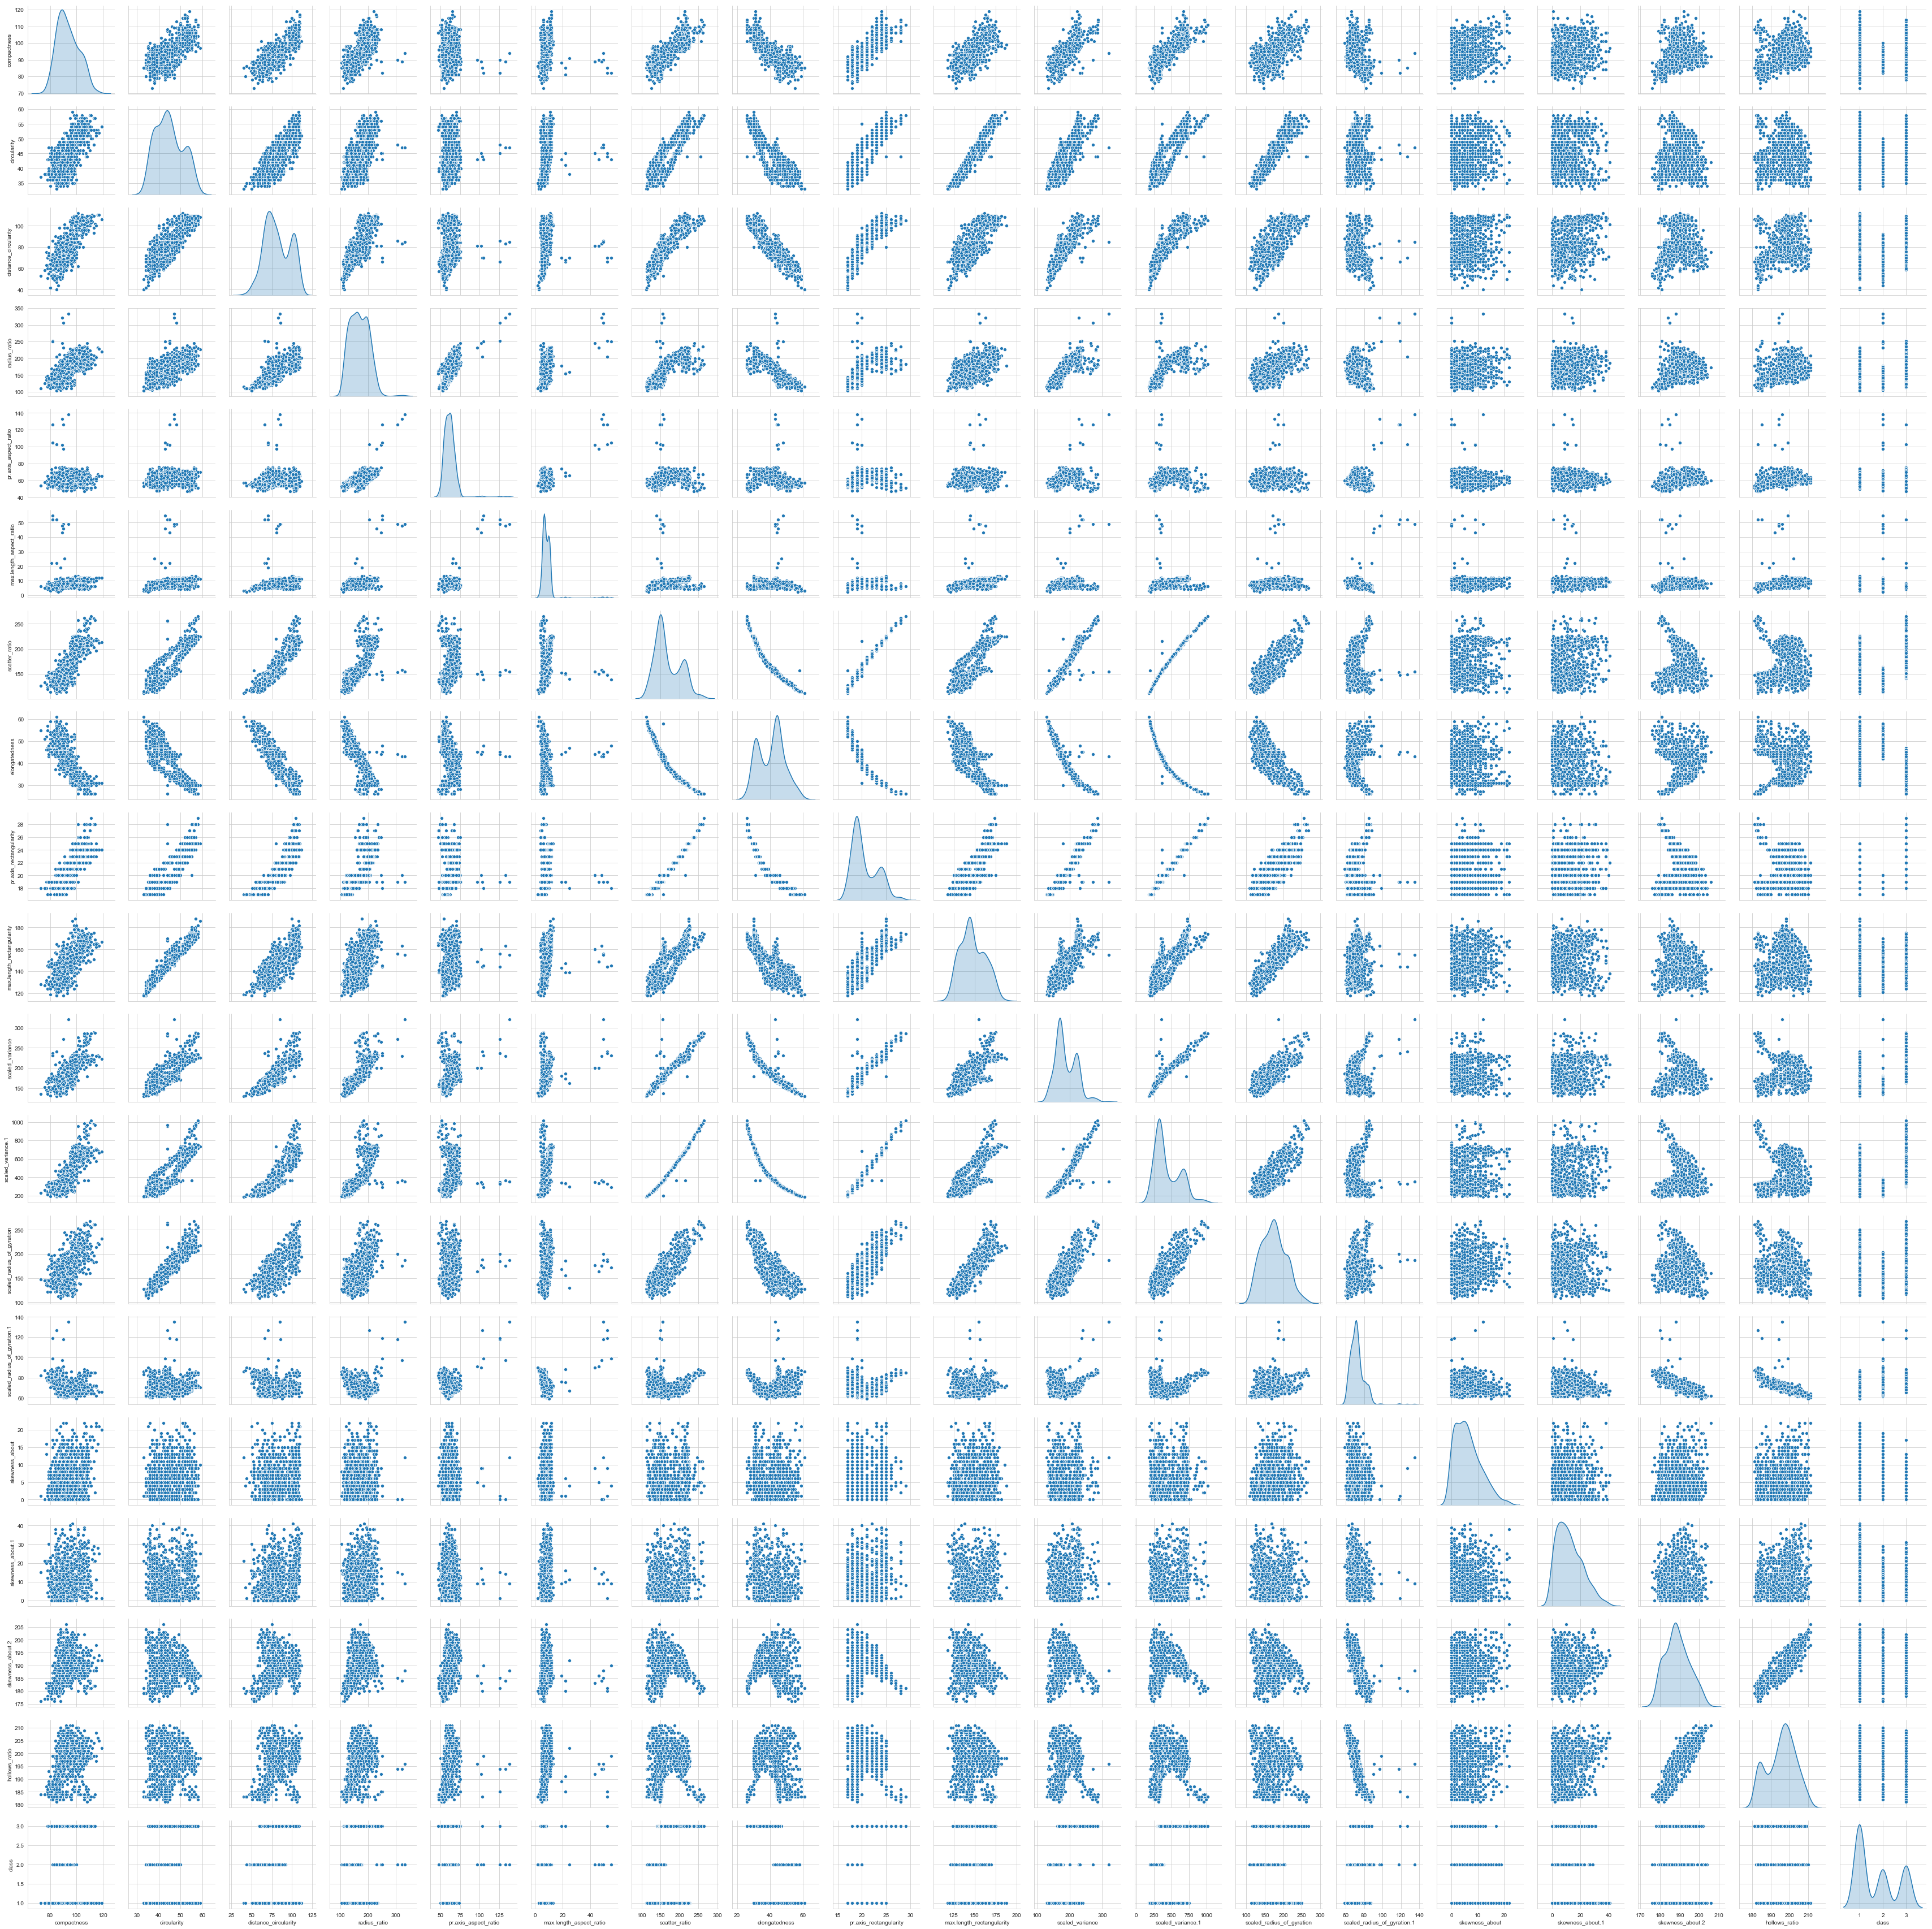

In [112]:
sns.pairplot(df, diag_kind='kde');

***As it is clear from pairplots that many independent column depend on each other, Also numbe of faetues are large in number we may suffer curse of dimensionality therfore to reduce if we use reduction tech. such as PCA to create new feature independent to each other, also it reduces number of column***  
***Also columns such as radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_variance','scaled_variance.1','scaled_radius_of_gyration.1','skewness_about','skewness_about.1' have outliers***

***Some column also have mix of gaussian such as 'circularity','scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1' ,'skewness_about.2', 'hollows_ratio'***

In [113]:
col=df.drop(labels='class',axis=1)
col=col.columns
print (col)

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')


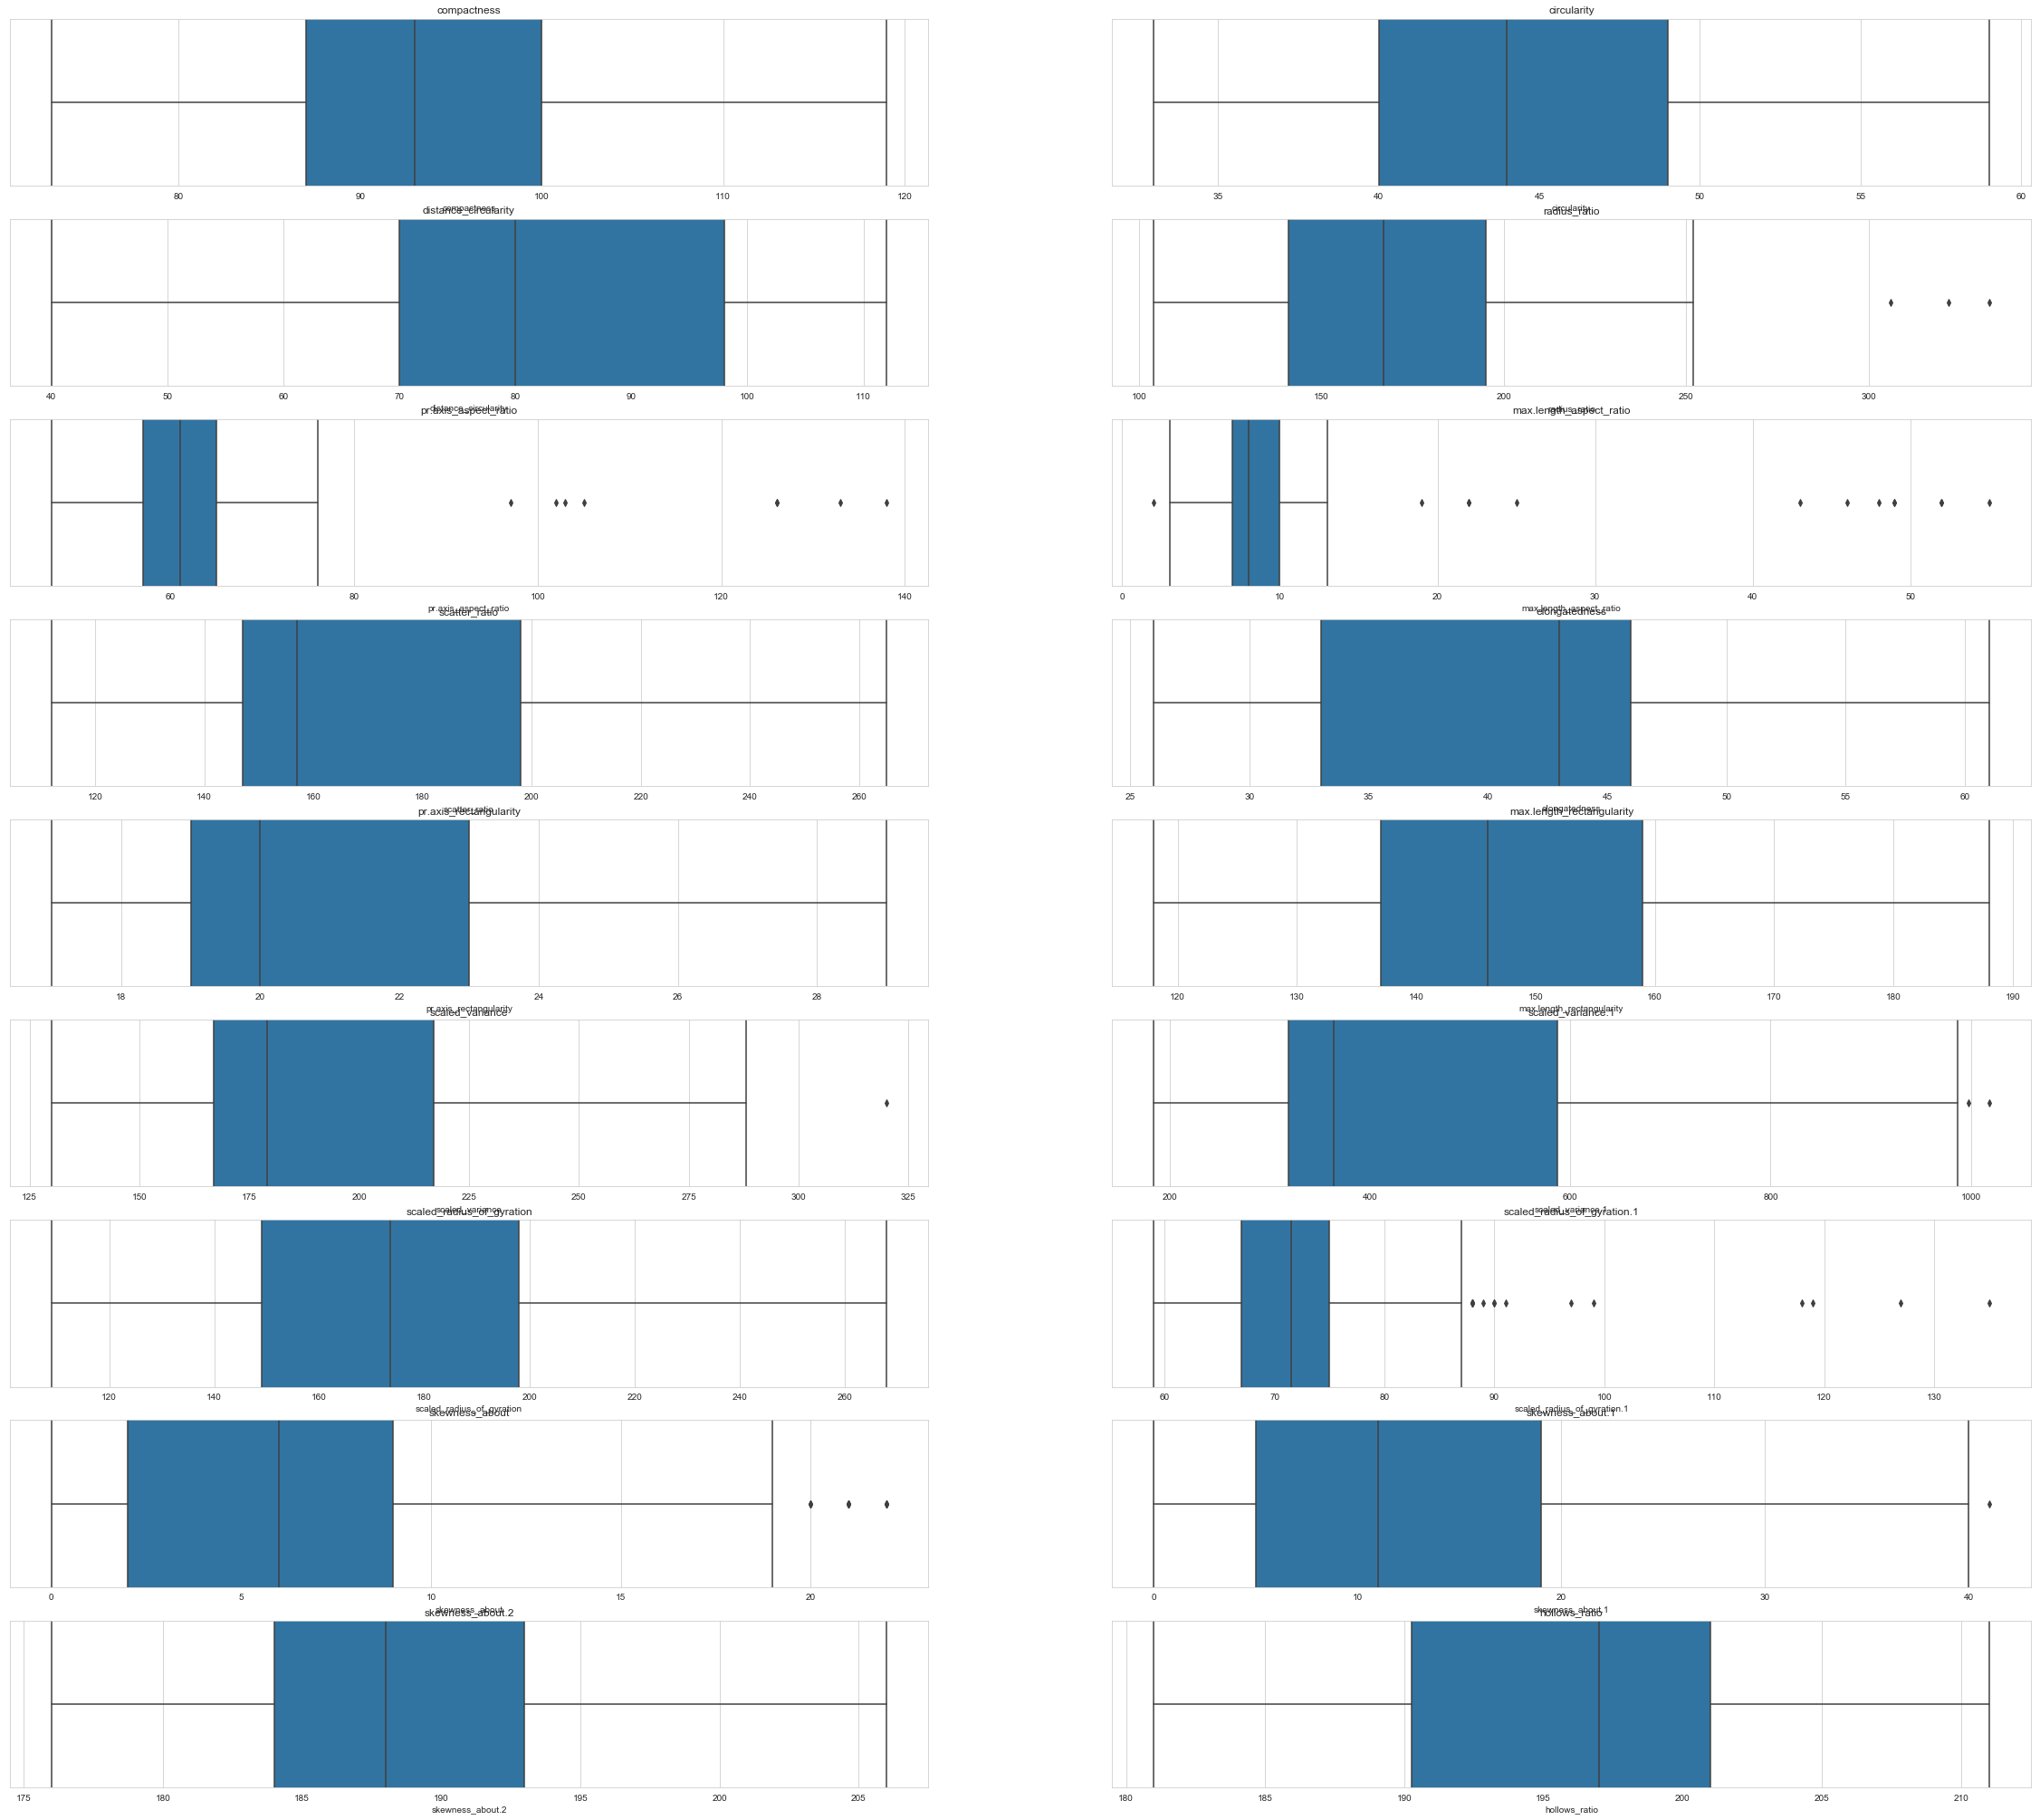

In [114]:
#To check outliers in numerical column

k=1
plt.figure(figsize=(40,40))
for i in col:
    plt.subplot(10,2,k)
    sns.boxplot(df[i],width=3)
    plt.title(i)
    k=k+1
plt.show()


In [115]:
#AS can be seen from boxplots columns such as 'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1' have outliers
k=['radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1']
print(len(k))

8


In [116]:
#To see number of outliers in each coulmns

k=['radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1']


print("NUMBER OF OUTLIERS")
for i in k:
    out1=1.5*(df[i].quantile(0.75) - df[i].quantile(0.25))
    out=df[i].quantile(0.75)+out1
    out2=df[i].quantile(0.25)-out1
   # print(i,' = ', out1)
    print(i," = ",df[df[i]>out][i].count())







NUMBER OF OUTLIERS
radius_ratio  =  3
pr.axis_aspect_ratio  =  8
max.length_aspect_ratio  =  12
scaled_variance  =  1
scaled_variance.1  =  2
scaled_radius_of_gyration.1  =  15
skewness_about  =  12
skewness_about.1  =  1


In [117]:
#This step can also be choosen this step replace outliers with median but you have mark below cell first then run this cell


#Replacing outliers with median of that columns

df['max.length_aspect_ratio']=np.where(df['max.length_aspect_ratio']<3,df['max.length_aspect_ratio'].median(),df['max.length_aspect_ratio'])

for i in k:
    out1=1.5*(df[i].quantile(0.75) - df[i].quantile(0.25))
    out=df[i].quantile(0.75)+out1
    df[i]=np.where(df[i]>out,df[i].median(),df[i])
    df[i]=np.where(df[i]<out2,df[i].median(),df[i])

print("This step is to see if outliers have been delt with")    
print("To see if data is till min or max as it will confirm outliers are removed")

print("Min")
for i in k:
    print(i," = ",df[i].min())

print("\n\n")

print("Max")
for i in k:
    print(i," = ",df[i].max())

This step is to see if outliers have been delt with
To see if data is till min or max as it will confirm outliers are removed
Min
radius_ratio  =  104.0
pr.axis_aspect_ratio  =  47.0
max.length_aspect_ratio  =  3.0
scaled_variance  =  130.0
scaled_variance.1  =  184.0
scaled_radius_of_gyration.1  =  59.0
skewness_about  =  0.0
skewness_about.1  =  0.0



Max
radius_ratio  =  252.0
pr.axis_aspect_ratio  =  76.0
max.length_aspect_ratio  =  13.0
scaled_variance  =  288.0
scaled_variance.1  =  987.0
scaled_radius_of_gyration.1  =  87.0
skewness_about  =  19.0
skewness_about.1  =  40.0


In [118]:
#Outliers have been removed there it shows zeros

k=['radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1']

print("NUMBER OF OUTLIERS")
for i in k:
    out1=1.5*(df[i].quantile(0.75) - df[i].quantile(0.25))
    out=df[i].quantile(0.75)+out1
    print(i," = ",df[df[i]>out][i].count())



NUMBER OF OUTLIERS
radius_ratio  =  0
pr.axis_aspect_ratio  =  0
max.length_aspect_ratio  =  0
scaled_variance  =  0
scaled_variance.1  =  0
scaled_radius_of_gyration.1  =  0
skewness_about  =  0
skewness_about.1  =  0


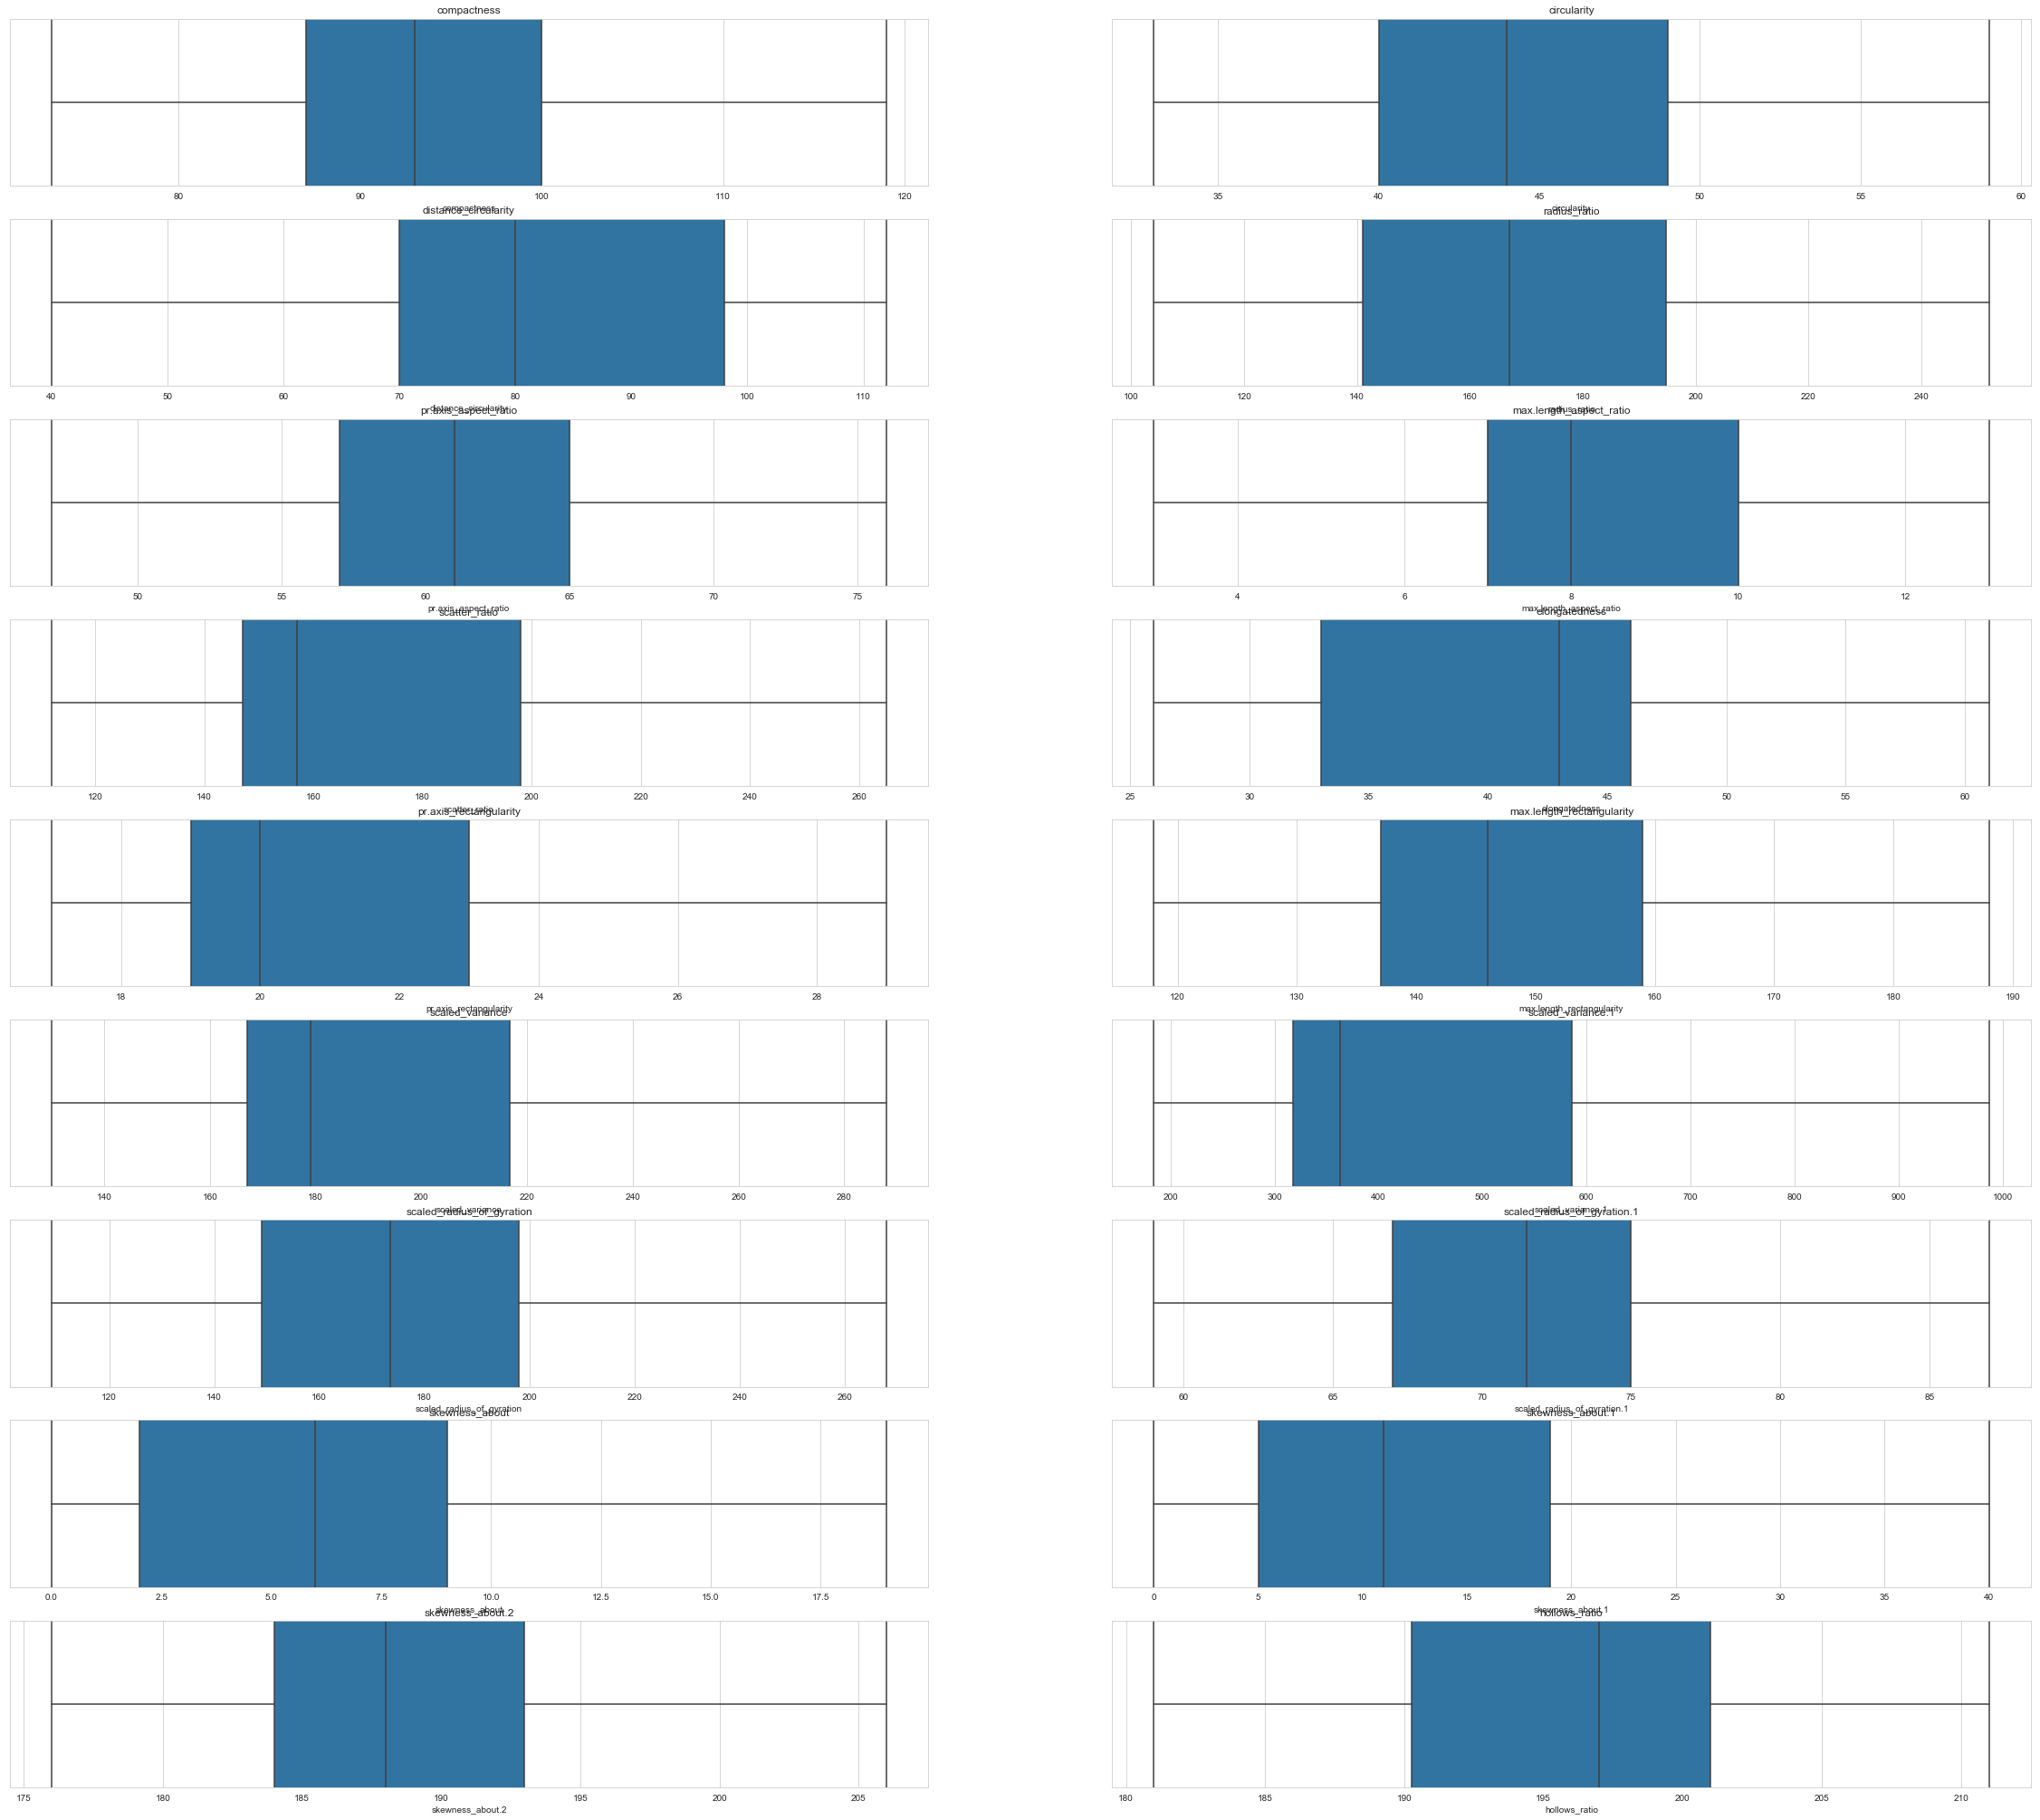

In [119]:
#To check that outliers are removed or not
k=1
plt.figure(figsize=(40,40))
for i in col:
    plt.subplot(10,2,k)
    sns.boxplot(df[i],width=3)
    plt.title(i)
    k=k+1
plt.show()

In [120]:
#TO see each class size
print(df.groupby('class').size())
print("\nvalues in percentage\n",(df['class'].value_counts()/df['class'].count())*100)

#Here one column have high number therefore we have to upsample or downsample but in this problem it is not required as they are in ratio 1/2 which is ok

class
1    429
2    199
3    218
dtype: int64

values in percentage
 1    50.709220
3    25.768322
2    23.522459
Name: class, dtype: float64


In [121]:
df.shape #quick check for everythig to be ok and see dataset size

(846, 19)

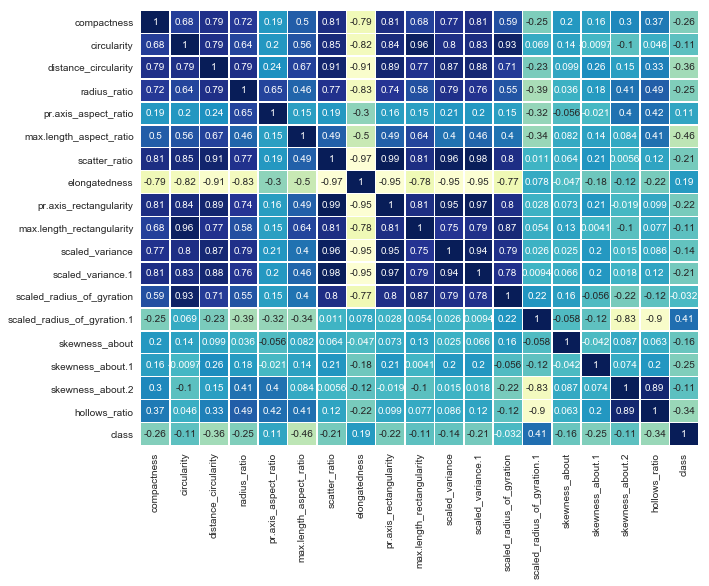

In [122]:
#To see the corelation between two independent column and one dependent and independent column
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()


***After seeing and performing model with various column I have decided to drop 'scaled_radius_of_gyration' as it has very less corr. Also it does not contibute much*** 

In [123]:

X,y=df.drop(labels=['class','scaled_radius_of_gyration'],axis=1).values,df[['class']].values
#after seeing and performing model with various column I have decided to drop 'scaled_radius_of_gyration' as it has very less corr

In [124]:
df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

# 2. Model buliding

In [125]:
#Scaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X2 = sc.fit_transform(X)


In [126]:
#Splittind data into traing and test with 80-20 ratio 
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2, random_state = 1)
X_train.shape

(676, 17)

#### SVM normal

In [127]:
#This is SVC with normal scaled data
clf = SVC(random_state=1)  
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
y_pred=clf.predict(X_test)


confusion_matrix(y_test,y_pred)


0.9733727810650887


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[87,  2,  1],
       [ 2, 41,  0],
       [ 2,  0, 35]], dtype=int64)

In [128]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.9733727810650887
0.9588235294117647


In [129]:
print("accuracy : {0:.4f}".format(accuracy_score(y_test,y_pred)))
print(metrics.classification_report(y_test,y_pred))

accuracy : 0.9588
             precision    recall  f1-score   support

          1       0.96      0.97      0.96        90
          2       0.95      0.95      0.95        43
          3       0.97      0.95      0.96        37

avg / total       0.96      0.96      0.96       170



In [130]:
#CROSS VALIDATION of 10 folds
res = cross_val_score(clf, X2, y, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

Average Accuracy: 	 0.9551
Accuracy SD: 		 0.0195


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 3. PCA 

1. Here I first split the features, that I want to convert into components X and to those who I dont want to convert X2. X has 12 feature and X2 has 5 features.
2. Then I Scaled both X and X2 
3. Then reduced X to 6 components which explains 95% of variance
4. Then I concatenate those 6 components with X2
5. Then I split data into train and test, after that I made SVC and evaluated the model
6. I also performed cross validation to assess the model properly


In [131]:
#split data into 2 parts X and X2. X contain those feature which shows some correletion with other features, their corr is higher than 5%.
#Where in X2, features are not correlated therefore applying PCA is not a good idea. Also PCA works with linear data 
X,y=df.drop(labels=['class','scaled_radius_of_gyration','scaled_radius_of_gyration.1','skewness_about','skewness_about.1','skewness_about.2','hollows_ratio'],axis=1),df[['class']]
X2=df.drop(labels=['class','scaled_radius_of_gyration','compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1'],axis=1)
X2.columns

Index(['scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')

In [132]:
#Scaling both X and X2
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
XScaled = sc.fit_transform(X)
type(XScaled)

sc2 = StandardScaler()
XScaled2 = sc2.fit_transform(X2)
type(XScaled2)


numpy.ndarray

In [133]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.72277977  0.1930925   0.50051942
   0.81358214 -0.78968322  0.81465658  0.67694334  0.77078163  0.80712401]
 [ 0.68569786  1.00118343  0.79325751  0.63903532  0.20349327  0.5611334
   0.8489411  -0.82244387  0.84439802  0.96245572  0.80371846  0.82844154]
 [ 0.79086299  0.79325751  1.00118343  0.79516215  0.24462154  0.66759792
   0.90614687 -0.9123854   0.89408198  0.77544391  0.87061349  0.88498924]
 [ 0.72277977  0.63903532  0.79516215  1.00118343  0.65132393  0.46450748
   0.77085211 -0.82636872  0.74502008  0.58015378  0.78711387  0.76115704]
 [ 0.1930925   0.20349327  0.24462154  0.65132393  1.00118343  0.15047265
   0.19442484 -0.29849719  0.16323988  0.14776643  0.20734569  0.19663295]
 [ 0.50051942  0.5611334   0.66759792  0.46450748  0.15047265  1.00118343
   0.49133933 -0.50477756  0.48850876  0.64347365  0.40186618  0.46379685]
 [ 0.81358214  0.8489411   0.90614687  0.77085211  0.19442484  0.49133933
   1.00118343 -0.97275069  0.9909

In [134]:
#PCA to see varaince explained by all 12 coulmns
pca = PCA(n_components=None)
pca.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [135]:
#printing variation explained with each column
print(pca.explained_variance_)

[8.94869136e+00 1.19959168e+00 8.32089008e-01 4.54801653e-01
 2.69779813e-01 9.49523980e-02 7.37131696e-02 4.47976432e-02
 3.75405138e-02 2.73542980e-02 2.54917786e-02 5.39787159e-03]


In [136]:
#printing eigon vectors acrss all 12 dimensions 
print(pca.components_)

[[ 0.28421111  0.29836452  0.31531667  0.2800016   0.09934411  0.20237111
   0.32618774 -0.32380427  0.32294067  0.28936667  0.31502552  0.32100058]
 [ 0.02283369  0.12962944  0.01355028 -0.44405049 -0.84720381  0.0665125
   0.08241644  0.02826889  0.1134462   0.18806246  0.0398127   0.07561745]
 [ 0.05206545 -0.15503993 -0.09877879  0.04366232 -0.10854555 -0.81969431
   0.17437173 -0.14309522  0.17151822 -0.28572498  0.27486295  0.20104385]
 [-0.43812139  0.54948903 -0.24232774 -0.1695166   0.24106913 -0.32877565
  -0.00756998  0.03190737 -0.0088512   0.50118486  0.00267218 -0.00989682]
 [-0.83162339 -0.17740022  0.25295408  0.02509528 -0.05790838  0.2068253
   0.12488386 -0.21902662  0.08155446 -0.2200876   0.19684818  0.0936939 ]
 [-0.04250592  0.22636574  0.41398918  0.49987366 -0.31229554 -0.21160441
  -0.24888819  0.09178404 -0.32864976  0.07103554  0.22006219 -0.38927166]
 [-0.06033392 -0.03774323 -0.75213439  0.43631367 -0.20459103  0.24953876
   0.00509339  0.02516218 -0.00578

In [137]:
#variation explained in terms of percentage
print(pca.explained_variance_ratio_)

[7.44842809e-01 9.98478098e-02 6.92587876e-02 3.78553385e-02
 2.24550771e-02 7.90334676e-03 6.13550318e-03 3.72872424e-03
 3.12467831e-03 2.27683036e-03 2.12180388e-03 4.49290928e-04]


#### Elbow method 

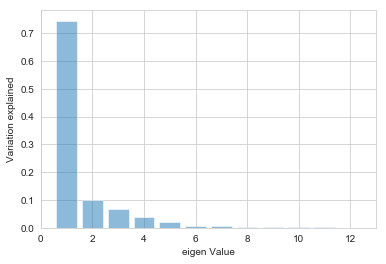

In [138]:
plt.bar(list(range(1,13)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

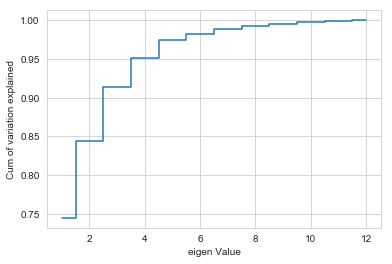

In [139]:
plt.step(list(range(1,13)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

#### Here it can be seen that 6 components can be used to explain more than 95% of variation of total data

In [140]:
#Recuding 12 column to 6 as they explain more than 95% of variation
pca3 = PCA(n_components=6)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[ 0.28421111  0.29836452  0.31531667  0.2800016   0.09934411  0.20237111
   0.32618774 -0.32380427  0.32294067  0.28936667  0.31502552  0.32100058]
 [ 0.02283369  0.12962944  0.01355028 -0.44405049 -0.84720381  0.0665125
   0.08241644  0.02826889  0.1134462   0.18806246  0.0398127   0.07561745]
 [ 0.05206545 -0.15503993 -0.09877879  0.04366232 -0.10854555 -0.81969431
   0.17437173 -0.14309522  0.17151822 -0.28572498  0.27486295  0.20104385]
 [-0.43812139  0.54948903 -0.24232774 -0.1695166   0.24106913 -0.32877565
  -0.00756998  0.03190737 -0.0088512   0.50118486  0.00267218 -0.00989682]
 [-0.83162339 -0.17740022  0.25295408  0.02509528 -0.05790838  0.2068253
   0.12488386 -0.21902662  0.08155446 -0.2200876   0.19684818  0.0936939 ]
 [-0.04250592  0.22636574  0.41398918  0.49987366 -0.31229554 -0.21160441
  -0.24888819  0.09178404 -0.32864976  0.07103554  0.22006219 -0.38927166]]
[0.74484281 0.09984781 0.06925879 0.03785534 0.02245508 0.00790335]


In [141]:
Xpca3.shape
XScaled2.shape

(846, 5)

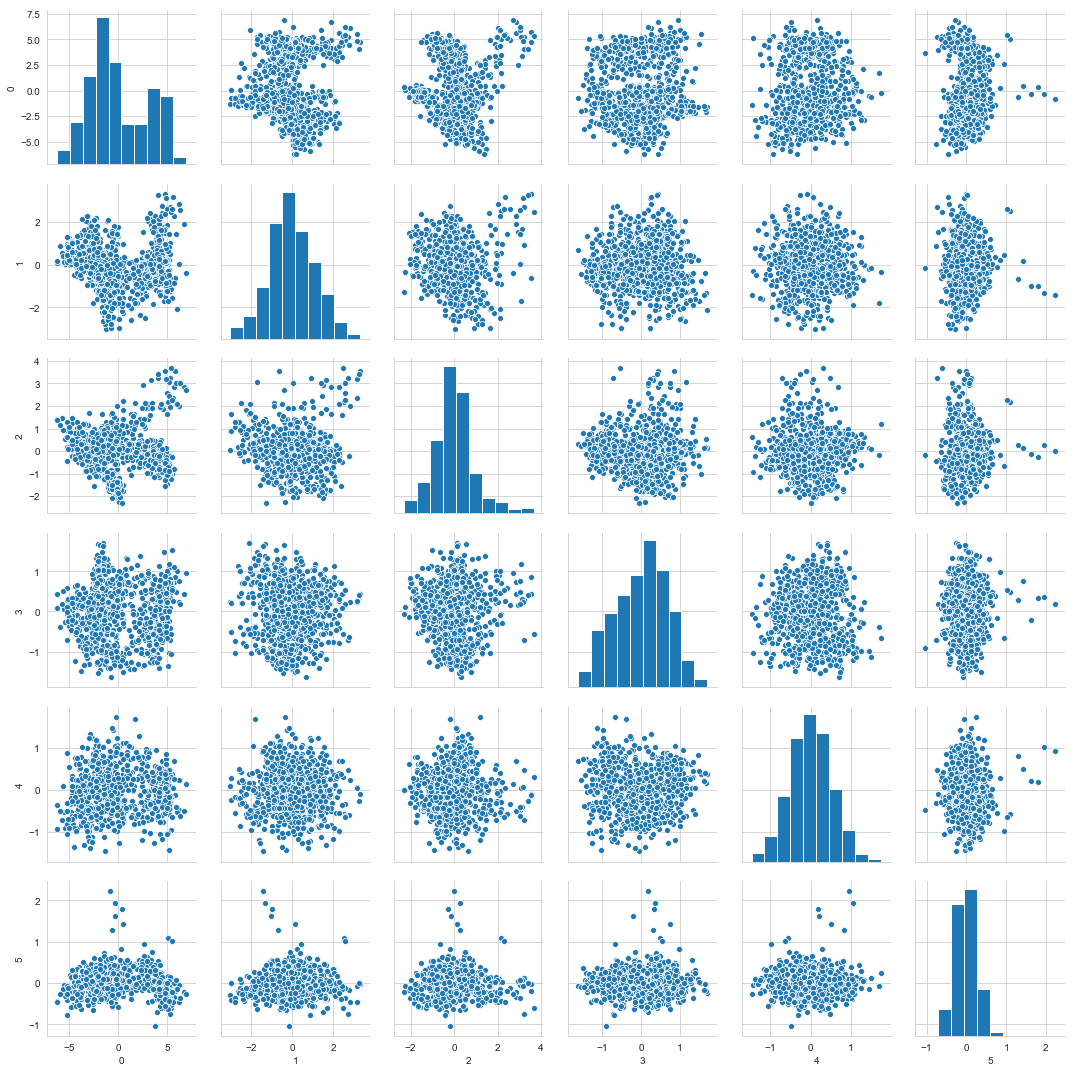

In [142]:
sns.pairplot(pd.DataFrame(Xpca3));

In [143]:
#Concatenate 6 components with X2
names=['scaled_radius_of_gyration.1','skewness_about','skewness_about.1','skewness_about.2','hollows_ratio']
Xpca3=pd.DataFrame(Xpca3)
XScaled2=pd.DataFrame(XScaled2,columns=names)
XScaled2.shape
Xpca=pd.concat([Xpca3,XScaled2],axis=1)



In [144]:
Xpca.shape

(846, 11)

In [145]:
#Splitting pca into training and test data
X_train_pca, X_test_pca, y_train, y_test = train_test_split(Xpca, y, test_size = 0.2, random_state = 1)

In [146]:
#SVC using pca
clf_pca = SVC(random_state=1)  
clf_pca.fit(X_train_pca, y_train)

print(clf_pca.score(X_train_pca, y_train))
y_pred_pca=clf_pca.predict(X_test_pca)


confusion_matrix(y_test,y_pred_pca)

0.9763313609467456


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[86,  2,  2],
       [ 2, 41,  0],
       [ 2,  0, 35]], dtype=int64)

In [147]:
#printing scores
print(clf_pca.score(X_train_pca,y_train))
print(clf_pca.score(X_test_pca,y_test))

0.9763313609467456
0.9529411764705882


In [148]:
print("accuracy : {0:.4f}".format(accuracy_score(y_test,y_pred_pca)))
print(metrics.classification_report(y_test,y_pred_pca))

accuracy : 0.9529
             precision    recall  f1-score   support

          1       0.96      0.96      0.96        90
          2       0.95      0.95      0.95        43
          3       0.95      0.95      0.95        37

avg / total       0.95      0.95      0.95       170



In [149]:
#CROSS VALIDATION of 10 folds
res = cross_val_score(clf_pca, Xpca, y, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

Average Accuracy: 	 0.9575
Accuracy SD: 		 0.0263


# 4. LDA

Note this is just a practice step as LDA is best suited for supervised learning
1. Here I first split the features, that I want to convert into components X and to those who I dont want to convert X2. X has 12 feature and X2 has 5 features.
2. Then I Scaled both X and X2 
3. Then reduced X to 2 components using LDA
4. Then I concatenate those 2 components with X2
5. Then I split data into train and test, after that I made SVC and evaluated the model
6. I also performed cross validation to assess the model properly


In [150]:
#split data into 2 parts X and X2. X contain those feature which shows some correletion with other features, their corr is higher than 5%.
#Where in X2, features are not correlated therefore applying LDA is not a good idea. Also LDA works with linear data similar to PCA 
X,y=df.drop(labels=['class','scaled_radius_of_gyration','scaled_radius_of_gyration.1','skewness_about','skewness_about.1','skewness_about.2','hollows_ratio'],axis=1),df[['class']]
X2=df.drop(labels=['class','scaled_radius_of_gyration','compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1'],axis=1)
X2.columns

Index(['scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')

In [151]:
#Scaling both X and X2
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
XScaled = sc.fit_transform(X)


sc2 = StandardScaler()
XScaled2 = sc2.fit_transform(X2)


In [152]:
#tranform to 2 components using LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X, y)



D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


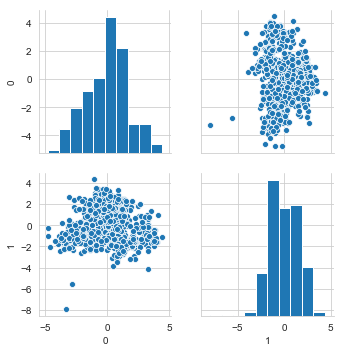

In [153]:
#pairplot of converted features
sns.pairplot(pd.DataFrame(X_train_lda))

In [154]:
#Concatenate those lda components with X2
names=['scaled_radius_of_gyration.1','skewness_about','skewness_about.1','skewness_about.2','hollows_ratio']
lda=pd.DataFrame(X_train_lda)
XScaled2=pd.DataFrame(XScaled2,columns=names)
print(XScaled2.shape)
lda=pd.concat([lda,XScaled2],axis=1)


(846, 5)


In [155]:
#Total shape of dataset
lda.shape

(846, 7)

In [156]:
#Splitting pca into training and test data
X_train_lda, X_test_lda, y_train, y_test = train_test_split(lda, y, test_size = 0.2, random_state = 1)

In [157]:
#SVC using LDA data
clf_lda = SVC(random_state=1)  
clf_lda.fit(X_train_lda, y_train)

print(clf_lda.score(X_train_lda, y_train))
y_pred_lda=clf_lda.predict(X_test_lda)


confusion_matrix(y_test,y_pred)

0.9556213017751479


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[87,  2,  1],
       [ 2, 41,  0],
       [ 2,  0, 35]], dtype=int64)

In [158]:
print(clf_lda.score(X_train_lda, y_train))
print(clf_lda.score(X_test_lda,y_test))

0.9556213017751479
0.9588235294117647


In [159]:
print("accuracy : {0:.4f}".format(accuracy_score(y_test,y_pred_lda)))
print(metrics.classification_report(y_test,y_pred_lda))

accuracy : 0.9588
             precision    recall  f1-score   support

          1       0.98      0.96      0.97        90
          2       0.93      0.98      0.95        43
          3       0.95      0.95      0.95        37

avg / total       0.96      0.96      0.96       170



In [160]:
#CROSS VALIDATION of 10 folds
res = cross_val_score(clf_lda, lda, y, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

Average Accuracy: 	 0.9446
Accuracy SD: 		 0.0332


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

# 5. KPCA

Note this is just a practice step as KPCA is advanced PCA and used for non linear distribution
1. Here  I split original data into taining and test of ratio 80-20
2. Then I scaled data 
3. Then I performed KPCA and transform to 8 components as This is bestresult I could get after seeing many componets such as 6,7,9,10.
4. Then made SVC using train_kpca and evaluated the model 

Note : this kpca wont perform well as after seeing multivarite I could guess that data is linear and kpca works on non linear data

In [161]:
X,y=df.drop(labels=['class','scaled_radius_of_gyration'],axis=1).values,df[['class']].values

In [162]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [163]:
#scaling of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [164]:
# Applying Kernel PCA with kernel=rbf
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 10, kernel = 'rbf')
X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)

In [165]:
clf_kpca = SVC(random_state=1)  
clf_kpca.fit(X_train_kpca, y_train)

print(clf_kpca.score(X_train_kpca, y_train))
y_pred_kpca=clf_kpca.predict(X_test_kpca)


confusion_matrix(y_test,y_pred_kpca)

0.849112426035503


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[75, 12,  3],
       [ 7, 35,  1],
       [ 1,  3, 33]], dtype=int64)

In [166]:
print("accuracy : {0:.4f}".format(accuracy_score(y_test,y_pred_kpca)))
print(metrics.classification_report(y_test,y_pred_kpca))

accuracy : 0.8412
             precision    recall  f1-score   support

          1       0.90      0.83      0.87        90
          2       0.70      0.81      0.75        43
          3       0.89      0.89      0.89        37

avg / total       0.85      0.84      0.84       170



In [167]:
#CROSS VALIDATION of 10 folds
res = cross_val_score(clf_kpca, X_train_kpca, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

Average Accuracy: 	 0.8506
Accuracy SD: 		 0.0458


***As I thought this model wont be working as good as LDA an PCA as data is linear***

# 6. grid search on PCA data

In [168]:
#To see which all parameter can we change
clf_pca.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [169]:
#Here we are providing the list so that algo runs each timewith these parameter, in every iteration it will select one value and at the end it will give best hyperparameter in next cell
params = [{'C': [0.01,0.05,0.5,1], 'kernel': ['linear']},
              {'C': [0.01,0.05,0.5,1], 'kernel': ['rbf']}]
grid_search_cv = GridSearchCV(clf_pca,
                              params, 
                              n_jobs=-1,
                              verbose=1)
grid_search_cv.fit(Xpca, y)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   15.2s finished
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']}, {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [170]:
grid_search_cv.best_estimator_

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [171]:
#Best c and kernel
grid_search_cv.best_params_

{'C': 0.5, 'kernel': 'rbf'}

#### Best values:
#### C: 0.5
#### kernel: 'rbf'

#### SVM with improved parameter

In [172]:
#SVC using pca
clf_pca = SVC(random_state=1,C=0.5,kernel='rbf')  
clf_pca.fit(X_train_pca, y_train)

print(clf_pca.score(X_train_pca, y_train))
y_pred_pca=clf_pca.predict(X_test_pca)


confusion_matrix(y_test,y_pred_pca)

0.9659763313609467


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[87,  2,  1],
       [ 4, 39,  0],
       [ 1,  1, 35]], dtype=int64)

In [173]:
#printing scores
print(clf_pca.score(X_train_pca,y_train))
print(clf_pca.score(X_test_pca,y_test))

0.9659763313609467
0.9470588235294117


In [174]:
print("accuracy : {0:.4f}".format(accuracy_score(y_test,y_pred_pca)))
print(metrics.classification_report(y_test,y_pred_pca))

accuracy : 0.9471
             precision    recall  f1-score   support

          1       0.95      0.97      0.96        90
          2       0.93      0.91      0.92        43
          3       0.97      0.95      0.96        37

avg / total       0.95      0.95      0.95       170



In [175]:
#CROSS VALIDATION of 10 folds
res = cross_val_score(clf_pca, Xpca, y, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

Average Accuracy: 	 0.9468
Accuracy SD: 		 0.0225


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#This is not improving performance as there might be other parameters that might affect the output with these parameter 

# 7. Conclusion

***According to me when we used the original data we got accuracy of 95.88% with CV score of 95.51% with std of 1.95. When we applied PCA and reduced column to 11 we got accuracy of 95.29% with CV score of 95.75% with std of 2.63 which according to me is good as 7 columns or features are reduced also we got added benefit of speed because of reduced dataset when using PCA
But in this kind of problem I would choose LDA as it is best suited for supervised technique and also it has least features which is 7 and it gave accuracy of 95.88% with CV score of 94.46% with std of 3.32, after LDA then I would choose PCA ***